In [1]:
%%time
import pandas as pd
import numpy as np
from rdkit import Chem, DataStructs
from rdkit.Chem import AllChem, MACCSkeys, Descriptors

# Defining the SMILES strings for the cucumin varients
curcumin_variants = (
    "COc3cc(OC)c(C/C=C/C2=CC(/C=C/Cc1c(OC)cc(OC)cc1OC)=[O+][B-](F)(F)O2)c(OC)c3",
    "COc3ccc(C/C=C/C2=[O+][B-](F)(F)OC(/C=C/Cc1c(OC)cc(OC)cc1OC)=C2)cc3",
    "COc3ccc(C/C=C/C2=CC(/C=C/Cc1ccc(OC)cc1OC)=[O+][B-](F)(F)O2)c(OC)c3",
    "COc5ccc(C/C=C/C4=[O+][B-](F)(F)OC(/C=C/Cc2c1ccccc1cc3ccccc23)=C4)cc5",
    "COc3ccc(OC)c(C/C=C/C2=CC(/C=C/Cc1cc(OC)ccc1OC)=[O+][B-](F)(F)O2)c3",
    "COc3cc(C/C=C/C2=CC(/C=C/Cc1ccc(O)c(OC)c1)=[O+][B-](F)(F)O2)ccc3O",
    "CN(C)c3ccc(C/C=C/C2=CC(/C=C/Cc1ccc(N(C)C)cc1)=[O+][B-](F)(F)O2)cc3",
    "N#Cc3ccc(C/C=C/C2=[O+][B-](F)(F)OC(/C=C/Cc1ccccc1)=C2)cc3",
    "COc6ccc(C/C=C/C5=CC(/C=C/Cc1cc2ccc3cccc4ccc(c1)c2c34)=[O+][B-](F)(F)O5)cc6",
    "COc4ccc(C/C=C/C3=CC(/C=C/Cc1ccc(OC)c2ccccc12)=[O+][B-](F)(F)O3)c5ccccc45",
    "CN(C)c4ccc(C/C=C/C3=CC(/C=C/Cc1ccc(N(C)C)c2ccccc12)=[O+][B-](F)(F)O3)c5ccccc45",
    "N#Cc3ccc(C/C=C/C2=CC(/C=C/Cc1ccc(C#N)cc1)=[O+][B-](F)(F)O2)cc3",
    "CCCCN(CCCC)c3ccc(C/C=C/C2=CC(/C=C/Cc1ccc(N(CCCC)CCCC)cc1)=[O+][B-](F)(F)O2)cc3",
    "COc3ccc(C/C=C/C2=CC(/C=C/Cc1ccc(C#N)cc1)=[O+][B-](F)(F)O2)cc3",
    "CN5/C(=C\C\C=C\C3=CC(/C=C/C/C=C/2N(C)c1ccccc1C2(C)C)=[O+][B-](F)(F)O3)C(C)(C)c4ccccc45",
    "COc3ccc(C/C=C/C2=[O+][B-](F)(F)OC(/C=C/Cc1ccc(SC)cc1)=C2)cc3",
    "CSc3ccc(C/C=C/C2=CC(/C=C/Cc1ccc(SC)cc1)=[O+][B-](F)(F)O2)cc3",
    "COc3ccc(C/C=C/C2=CC(/C=C/Cc1ccc(N(C)C)cc1)=[O+][B-](F)(F)O2)cc3",
    "COc1ccccc1C/C=C/C3=CC(/C=C/Cc2ccccc2OC)=[O+][B-](F)(F)O3",
    "CCCCCC(CC)c5ccc(c4ccc(C/C=C/C3=CC(/C=C/Cc2ccc(c1ccc(C(CC)CCCCC)s1)s2)=[O+][B-](F)(F)O3)s4)s5"
)

molecule_names = ['2-ADMeO3', '3-MR83a', 'AD-10', 'AD-1013', 'AD-1022', 'AD-11', 'AD-14-Moore', 'AD-16-DMF', 'AD-18', 'AD-24', 'AD-25', 'AD-3', 'AD-35', 'AD-4', 'AD-48', 'AD-5', 'AD-6', 'AD-7', 'AD-9', 'YD-30']
homo_lumo_gap = [3.077, 3.072, 3.259, 2.625, 2.938, 2.946, 2.811, 3.231, 2.735, 2.878, 2.686, 3.215, 2.77, 3.001, 2.702, 2.97, 2.89, 2.859, 3.137, 2.525]


molecules = [Chem.MolFromSmiles(smiles) for smiles in curcumin_variants]
mws = [round(Descriptors.MolWt(mol),3) for mol in molecules]
logp = [Descriptors.MolLogP(mol) for mol in molecules]

# Create the initial DataFrame
data = {
    'Molecule': molecule_names,
    'Molecular Weight': mws,
    'LogP': logp,
    'Homo-Lumo Gap (eV)': homo_lumo_gap,
    'Smiles': curcumin_variants
}
curcumin_df = pd.DataFrame(data)
curcumin_df['mol'] = curcumin_df['Smiles'].apply(Chem.MolFromSmiles)

# Harvard OPV dataset import
data = pd.read_csv('https://raw.githubusercontent.com/AjStephan/havard-smile-opv/main/Non-fullerene%20small-molecules%20acceptors.csv')
opv_df = data.drop(columns=[
    'index', 'inchikey', 'HOMO_calc', 'LUMO_calc', 'LUMO_calib', 'LUMO_calib_stds',
    'HOMO_calib', 'HOMO_calib_stds','GAP_calc', 'molW', 'PCE_calc', 'Voc_calc', 'Jsc_calc',
    'FF_calc', 'EQE_calc', 'PCE_calib', 'Voc_calib', 'Jsc_calib', 'FF_calib',
    'EQE_calib', 'PCE_cdiff', 'PCE_calib_plus'], axis=1)

opv_df['mol'] = opv_df['smiles'].apply(Chem.MolFromSmiles)

CPU times: total: 11.5 s
Wall time: 23.2 s


In [2]:
%%time
import pandas as pd
import numpy as np
from rdkit import Chem, DataStructs
from rdkit.Chem import AllChem

# Defining the molecule to be used for similarity search
reference_molecule_smiles = 'Cc3ccc(/C=C/C2=CC(/C=C/c1ccc(C)cc1)=[O+][B-](F)(F)O2)cc3'
reference_molecule = Chem.MolFromSmiles(reference_molecule_smiles)

# Function to calculate similarity using Dice metric
def calculate_similarity(fp1, fp2):
    return DataStructs.DiceSimilarity(fp1, fp2)

# Dictionary to hold the dataframes
similarity_dfs = {}

# Using Morgan fingerprint only
fp_name = "morgan"
fp_func = lambda mol: AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=2048)
reference_fp = fp_func(reference_molecule)

# Loop over quantiles from top 6% to top 60% in intervals of 6%
for quantile in np.arange(0.94, 0.39, -0.06):
    # Calculate similarity and create a new dataframe with similarity scores
    opv_df_sim = opv_df.copy()
    opv_df_sim[f'similarity_{fp_name}_dice'] = opv_df_sim['mol'].apply(
        lambda x: calculate_similarity(fp_func(x), reference_fp)
    )
    
    # Filter top similar molecules based on the quantile
    quantile_value = opv_df_sim[f'similarity_{fp_name}_dice'].quantile(quantile)
    top_similar_df = opv_df_sim[opv_df_sim[f'similarity_{fp_name}_dice'] >= quantile_value]
    
    # Store in dictionary
    quantile_percentage = int((1 - quantile) * 100)
    similarity_dfs[f'similarity_{fp_name}_dice_top{quantile_percentage}'] = top_similar_df

    print(f"Similarity calculation for {fp_name} fingerprint with Dice metric done for top {quantile_percentage}% --> shape: {top_similar_df.shape}")

Similarity calculation for morgan fingerprint with Dice metric done for top 6% --> shape: (3143, 4)
Similarity calculation for morgan fingerprint with Dice metric done for top 12% --> shape: (6280, 4)
Similarity calculation for morgan fingerprint with Dice metric done for top 18% --> shape: (9481, 4)
Similarity calculation for morgan fingerprint with Dice metric done for top 24% --> shape: (12408, 4)
Similarity calculation for morgan fingerprint with Dice metric done for top 30% --> shape: (15587, 4)
Similarity calculation for morgan fingerprint with Dice metric done for top 36% --> shape: (18729, 4)
Similarity calculation for morgan fingerprint with Dice metric done for top 42% --> shape: (22178, 4)
Similarity calculation for morgan fingerprint with Dice metric done for top 48% --> shape: (24961, 4)
Similarity calculation for morgan fingerprint with Dice metric done for top 54% --> shape: (27921, 4)
Similarity calculation for morgan fingerprint with Dice metric done for top 60% --> sh

In [3]:
%%time
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem

# Function to generate Morgan fingerprints safely
def generate_morgan_fingerprint_safe(smiles):
    """Generate Morgan fingerprint and handle errors gracefully."""
    try:
        mol = Chem.MolFromSmiles(smiles)
        if mol:
            return list(AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=2048))
    except Exception as e:
        print(f"Error generating fingerprint for SMILES {smiles}: {e}")
        return None
    return None

# Dictionary to store processed dataframes
processed_similarity_dfs = {}

# Process each dataframe generated by the previous script
for quantile in np.arange(0.94, 0.39, -0.06):
    quantile_percentage = int((1 - quantile) * 100)
    combination = f'similarity_morgan_dice_top{quantile_percentage}'
    
    if combination in similarity_dfs:
        df = similarity_dfs[combination]
        print(f"Processing {combination}...")
        
        # Make sure df is a copy, not a slice, to avoid the warning
        df = df.copy()

        # Apply the function and store the result in a new column
        df['Morgan_Fingerprints'] = df['smiles'].apply(generate_morgan_fingerprint_safe)
        df = df[df['Morgan_Fingerprints'].notnull()].reset_index(drop=True)
        
        # Convert fingerprints to a DataFrame and concatenate with the original
        morgan_df = pd.DataFrame(df['Morgan_Fingerprints'].tolist(), columns=[f'morgan_{i}' for i in range(2048)])
        df_combined = pd.concat([df.drop(columns=['Morgan_Fingerprints']), morgan_df], axis=1)
        
        # Store the combined DataFrame
        processed_similarity_dfs[combination] = df_combined
        print(f"Finished processing {combination} - shape {df_combined.shape}")

# Unpacking the dictionary to individual DataFrames
for combination, df in processed_similarity_dfs.items():
    globals()[f'similarity_dfs_{combination}'] = df

Processing similarity_morgan_dice_top6...
Finished processing similarity_morgan_dice_top6 - shape (3143, 2052)
Processing similarity_morgan_dice_top12...
Finished processing similarity_morgan_dice_top12 - shape (6280, 2052)
Processing similarity_morgan_dice_top18...
Finished processing similarity_morgan_dice_top18 - shape (9481, 2052)
Processing similarity_morgan_dice_top24...
Finished processing similarity_morgan_dice_top24 - shape (12408, 2052)
Processing similarity_morgan_dice_top30...
Finished processing similarity_morgan_dice_top30 - shape (15587, 2052)
Processing similarity_morgan_dice_top36...
Finished processing similarity_morgan_dice_top36 - shape (18729, 2052)
Processing similarity_morgan_dice_top42...
Finished processing similarity_morgan_dice_top42 - shape (22178, 2052)
Processing similarity_morgan_dice_top48...
Finished processing similarity_morgan_dice_top48 - shape (24961, 2052)
Processing similarity_morgan_dice_top54...
Finished processing similarity_morgan_dice_top54 -

In [5]:
# Required imports
from sklearn.metrics import r2_score, mean_squared_error
import lightgbm as lgb
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# Tuned parameters for LightGBM
tuned_params = {'n_estimators': 1000, 'learning_rate': 0.23685145356420312, 'num_leaves': 51}

# To store results
results = []

# Loop through each dataframe in the processed_similarity_dfs dictionary
for name, df in processed_similarity_dfs.items():
    print(f"Processing {name}...")
    
    # Features (skip the first 4 columns to get the Morgan fingerprint columns)
    X = df.iloc[:, 4:]
    
    # Target variable
    y = df['GAP_calib']  
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)
    
    # Initialize and train the LightGBM model
    model = lgb.LGBMRegressor(**tuned_params)
    model.fit(X_train, y_train)
    
    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate R² scores
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    
    # Calculate RMSE (Root Mean Squared Error)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    # Extract percentile from the dataframe name
    # Assuming the name format is "similarity_morgan_dice_topXX"
    try:
        percentile = int(name.split('_')[-1].replace('top', ''))  # Extract "XX" from "topXX"
        percentile_str = f"Top {percentile}%"  # Convert to string format "Top XX%"
    except ValueError:
        percentile = np.nan  # Handle cases where the name does not follow the expected format
        percentile_str = "Unknown"  # Set a default value for the string
    
    # Store results
    results.append({
        'similarity_method': name,
        'train_r2_score': train_r2,
        'test_r2_score': test_r2,
        'train_rmse': train_rmse,
        'test_rmse': test_rmse,
        'percentile_int': percentile,
        'Filtered Percentage': percentile_str,
        'num_molecules': df.shape[0]
    })
    
    print(f"Done processing {name} with Test R² score: {test_r2}, Test RMSE: {test_rmse}")

# Convert results to a DataFrame for further analysis
final_results = pd.DataFrame(results)
final_results.head()

Processing similarity_morgan_dice_top6...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002509 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1250
[LightGBM] [Info] Number of data points in the train set: 2357, number of used features: 625
[LightGBM] [Info] Start training from score 2.799595
Done processing similarity_morgan_dice_top6 with Test R² score: 0.9116544622279132, Test RMSE: 0.1802194971121202
Processing similarity_morgan_dice_top12...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008153 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1694
[LightGBM] [Info] Number of data points in the train set: 4710, number of used features: 847
[LightGBM] [Info] Start training from scor

,similarity_method,train_r2_score,test_r2_score,train_rmse,test_rmse,percentile_int,Filtered Percentage,num_molecules
0,similarity_morgan_dice_top6,0.998788,0.911654,0.020637,0.180219,6,Top 6%,3143
1,similarity_morgan_dice_top12,0.998174,0.920087,0.025399,0.167949,12,Top 12%,6280
2,similarity_morgan_dice_top18,0.997740,0.909185,0.028264,0.180725,18,Top 18%,9481
3,similarity_morgan_dice_top24,0.996482,0.926005,0.035192,0.162563,24,Top 24%,12408
4,similarity_morgan_dice_top30,0.995301,0.939802,0.040628,0.146145,30,Top 30%,15587


In [33]:
import plotly.graph_objects as go

# Ensure final_results DataFrame is sorted by percentile for better visualization
final_results_sorted = final_results.sort_values(by='percentile_int')

# Determine the top 3 R² scores and their indices
top_3_indices = final_results_sorted['test_r2_score'].nlargest(3).index

# Create a color array to highlight the top 3 R² scores
colors = ['rgba(55, 83, 109, 0.7)'] * len(final_results_sorted)
for i in top_3_indices:
    colors[i] = 'rgba(255, 99, 71, 0.8)'  # Highlight with a distinct color, e.g., tomato red

# Create the figure
fig = go.Figure()

# Bar plot for R² scores
fig.add_trace(go.Bar(
    x=final_results_sorted['Filtered Percentage'],
    y=final_results_sorted['test_r2_score'],
    name='Test R² Score',
    marker_color=colors,
    text=final_results_sorted['test_r2_score'].round(3),
    textposition='auto'
))

# Line plot for the number of molecules
fig.add_trace(go.Scatter(
    x=final_results_sorted['Filtered Percentage'],
    y=final_results_sorted['num_molecules'],
    name='Number of Molecules',
    yaxis='y2',
    mode='lines+markers',
    line=dict(color='firebrick', width=2),
    marker=dict(size=8),
    text=final_results_sorted['num_molecules']
))

# Update the layout to include a secondary y-axis
fig.update_layout(
    title='R² Score and Number of Molecules vs. Filtered Percentage',
    xaxis=dict(
        title='Filtered Percentage',
        tickmode='array',
        tickvals=final_results_sorted['Filtered Percentage'],
    ),
    yaxis=dict(
        title='Test R² Score',
        showgrid=False,
    ),
    yaxis2=dict(
        title='Number of Molecules',
        overlaying='y',
        side='right',
        showgrid=False,
    ),
    legend=dict(
        x=0.5,
        y=1.0,
        orientation='h',
        bgcolor='rgba(255, 255, 255, 0)',
    ),
    template='plotly_white',
    margin=dict(l=100, r=100, t=100, b=50),
    height=800,
    width = 1000
)

# Display the figure
fig.show()

In [41]:
import plotly.graph_objects as go

# Ensure final_results DataFrame is sorted by percentile for better visualization
final_results_sorted = final_results.sort_values(by='percentile_int')

# Calculate the variation between train and test R² scores
final_results_sorted['r2_variation'] = abs(final_results_sorted['train_r2_score'] - final_results_sorted['test_r2_score'])

# Identify the best model with the highest test R² and lowest variation
best_model = final_results_sorted.loc[final_results_sorted['test_r2_score'].idxmax()]

# Create the figure
fig = go.Figure()

# Grouped bar plot for Train and Test R² scores
fig.add_trace(go.Bar(
    x=final_results_sorted['Filtered Percentage'],
    y=final_results_sorted['train_r2_score'],
    name='Train R² Score',
    marker_color='rgba(55, 83, 109, 0.7)',
    text=final_results_sorted['train_r2_score'].round(5),
    textposition='auto'
))

fig.add_trace(go.Bar(
    x=final_results_sorted['Filtered Percentage'],
    y=final_results_sorted['test_r2_score'],
    name='Test R² Score',
    marker_color='rgba(255, 99, 71, 0.8)',
    text=final_results_sorted['test_r2_score'].round(5),
    textposition='auto'
))

# Highlight the best model with an annotation arrow
fig.add_annotation(
    x=best_model['Filtered Percentage'],
    y=best_model['test_r2_score'],
    ax=best_model['Filtered Percentage'],
    ay=best_model['test_r2_score'] + 0.1,  # Adjust this value to position the arrow
    xref='x',
    yref='y',
    axref='x',
    ayref='y',
    text=f"Best Model\nTest R²: {best_model['test_r2_score']:.2f}\nTrain R²: {best_model['train_r2_score']:.2f}\nNum Molecules: {best_model['num_molecules']}",
    showarrow=True,
    arrowhead=2,
    arrowsize=2,
    arrowwidth=2,
    arrowcolor='blue',
    font=dict(size=12, color='black'),
    bgcolor='white'
)

# Update the layout to include the grouped bars
fig.update_layout(
    title='Train and Test R² Scores vs. Filtered Percentage',
    xaxis=dict(
        title='Filtered Percentage',
        tickmode='array',
        tickvals=final_results_sorted['Filtered Percentage'],
    ),
    yaxis=dict(
        title='R² Score',
        showgrid=True,
    ),
    barmode='group',
    legend=dict(
        x=0.5,
        y=1.05,
        orientation='h',
        bgcolor='rgba(255, 255, 255, 0)',
    ),
    template='plotly_white',
    margin=dict(l=100, r=100, t=100, b=50),
    height=800
)

# Display the figure
fig.show()

In [4]:
similarity_dfs_similarity_morgan_dice_top48.head()

,smiles,GAP_calib,mol,similarity_morgan_dice,morgan_0,morgan_1,morgan_2,morgan_3,morgan_4,morgan_5,...,morgan_2038,morgan_2039,morgan_2040,morgan_2041,morgan_2042,morgan_2043,morgan_2044,morgan_2045,morgan_2046,morgan_2047
0,CN1C(=O)C(=Cc2occc2C(=O)c2ccc(-c3ncc(C4=CC=CC5...,2.601647,<rdkit.Chem.rdchem.Mol object at 0x000001FE1CB...,0.135922,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CN1C(=O)C(=CC2=CC=C(c3cnc(-c4ccc(C(=O)c5ccoc5)...,2.204408,<rdkit.Chem.rdchem.Mol object at 0x000001FE1CB...,0.161616,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CN1C(=O)C(=Cc2ncc(-c3ccc(C(=O)c4cocc4C=Cc4ccnc...,2.374851,<rdkit.Chem.rdchem.Mol object at 0x000001FE1CB...,0.144330,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CN1C(=O)C(=Cc2nccc(C=Cc3cocc3C(=O)c3ccc(-c4cnc...,2.887886,<rdkit.Chem.rdchem.Mol object at 0x000001FE1CB...,0.141414,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CN1C(=O)C(=Cc2sc(C#N)c(-c3ncc(-c4ccsc4C(=O)c4c...,2.876440,<rdkit.Chem.rdchem.Mol object at 0x000001FE1CB...,0.161616,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
def generate_morgan_fingerprint_safe(smiles):
    """Generate Morgan fingerprint and handle errors gracefully."""
    try:
        mol = Chem.MolFromSmiles(smiles)
        if mol:
            return list(AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=2048))
    except Exception:
        return None
    return None

# apply morgan fingerprint to the curcumin_df dataframe
curcumin_df['Morgan_Fingerprints'] = curcumin_df['Smiles'].apply(generate_morgan_fingerprint_safe)
curcumin_df = curcumin_df[curcumin_df['Morgan_Fingerprints'].notnull()].reset_index(drop=True)
morgan_df = pd.DataFrame(curcumin_df['Morgan_Fingerprints'].tolist(), columns=[f'morgan_{i}' for i in range(2048)])

curcumin_df_mf = pd.concat([curcumin_df.drop(columns=['Morgan_Fingerprints']), morgan_df], axis=1)

In [8]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Features and target variable
x = similarity_dfs_similarity_morgan_dice_top30.iloc[:, 4:]
y = similarity_dfs_similarity_morgan_dice_top30['GAP_calib']

tuned_params = {'n_estimators': 1000, 'learning_rate': 0.23685145356420312, 'num_leaves': 51}

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=123)

# Initialize and train the LightGBM model
model = lgb.LGBMRegressor(**tuned_params)
model.fit(x_train, y_train)

# Make predictions and calculate R^2 score
y_pred = model.predict(x_test)

# Calculate R2 score
r2_model = r2_score(y_test, y_pred)
from sklearn.metrics import mean_squared_error
rmse_model = mean_squared_error(y_test, y_pred, squared=False)

curcumin_df_mf_pred = curcumin_df_mf.copy()
curcumin_df_mf_pred['Homo-Lumo Gap (eV) Pred'] = model.predict(curcumin_df_mf.iloc[:, 6:])
curcumin_df_mf_pred = curcumin_df_mf_pred.sort_values(by='Homo-Lumo Gap (eV)', ascending=False).reset_index(drop=True)

from sklearn.metrics import root_mean_squared_error, mean_absolute_error

# calculate the RMSE and MAE scores for each Homo-Lumo Gap (eV) and gap_calib_pred values
rmse = mean_squared_error(curcumin_df_mf_pred['Homo-Lumo Gap (eV)'], curcumin_df_mf_pred['Homo-Lumo Gap (eV) Pred'], squared=False)
mae = mean_absolute_error(curcumin_df_mf_pred['Homo-Lumo Gap (eV)'], curcumin_df_mf_pred['Homo-Lumo Gap (eV) Pred'])

print(f'RMSE: {rmse}')
print(f'MAE: {mae}')

print(f"Model similarity_morgan_dice R2 Score: {r2_model} & RMSE value: {rmse_model}")
#print(f"Prediction with similarity_morgan_dice model R2 Score: {r2_predict} & RMSE value: {rmse_predict}")                                           

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007012 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2302
[LightGBM] [Info] Number of data points in the train set: 11690, number of used features: 1151
[LightGBM] [Info] Start training from score 2.764779
RMSE: 0.20967858665916606
MAE: 0.1752033989761512
Model similarity_morgan_dice R2 Score: 0.9398020190041924 & RMSE value: 0.14614475789047782


c:\Users\Chamod Peiris\Documents\GitHub\Curcumin_BendGap_Cheminfo\.venv\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Chamod Peiris\Documents\GitHub\Curcumin_BendGap_Cheminfo\.venv\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [10]:
curcumin_df_mf_pred.to_csv(path_or_buf=r"C:\Users\Chamod Peiris\Documents\Curcumin_Scripts\curcumin_pred_48_best_opt.csv")

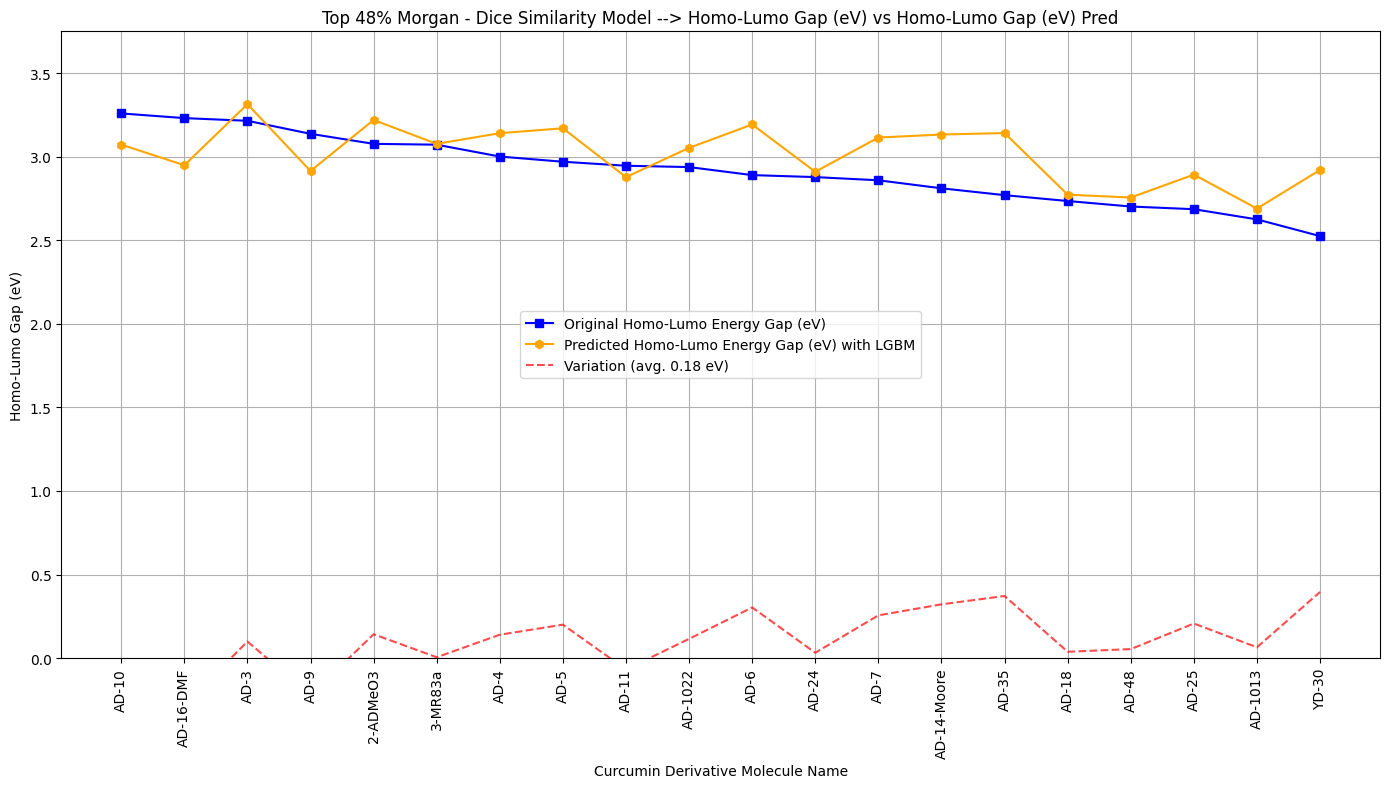

In [12]:
import matplotlib.pyplot as plt

# Calculate the variation
variation = curcumin_df_mf_pred['Homo-Lumo Gap (eV) Pred'] - curcumin_df_mf_pred['Homo-Lumo Gap (eV)']

# Calculate the average variation
avg_variation = np.mean(np.abs(variation))

# Plotting the original GAP, predicted values, and variation
plt.figure(figsize=(14, 7))

# Plot original Homo-Lumo Gap (eV)
plt.plot(curcumin_df_mf_pred['Molecule'], curcumin_df_mf_pred['Homo-Lumo Gap (eV)'], marker='s', label='Original Homo-Lumo Energy Gap (eV)', color='blue')

# Plot predicted Homo-Lumo Gap (eV)
plt.plot(curcumin_df_mf_pred['Molecule'], curcumin_df_mf_pred['Homo-Lumo Gap (eV) Pred'], marker='h', label='Predicted Homo-Lumo Energy Gap (eV) with LGBM', color='orange')

# Plot variation line
plt.plot(curcumin_df_mf_pred['Molecule'], variation, linestyle='--', color='red', alpha=0.7, label=f'Variation (avg. {avg_variation:.2f} eV)')

# Labeling the axes
plt.xlabel('Curcumin Derivative Molecule Name')
plt.ylabel('Homo-Lumo Gap (eV)')

# Adding grid, layout, and title
plt.grid(True)
plt.tight_layout()
plt.title('Top 48% Morgan - Dice Similarity Model --> Homo-Lumo Gap (eV) vs Homo-Lumo Gap (eV) Pred')

# Displaying legend with centered position
plt.legend(loc='center')

# Setting y-axis limits
plt.ylim(0, 3.75)

# Rotating x-axis labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.show()